# 5.Proje-Bilgisayar Özellik ve Bilgileri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv("laptopdata.csv")

In [3]:
df.head()

,brand,operating_system,RAM_nth,storage_nth,storage_type,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price
0,LENOVO,WINDOWS,2,6.906891,SSD,2501,4,15.6,141,0.0,YES,235.99
1,ASUS,WINDOWS,2,7.000000,SSD,3048,3,15.6,141,1.0,YES,236.99
2,LENOVO,WINDOWS,2,7.000000,SSD,3685,3,15.6,94,0.0,YES,259.99
3,HP,WINDOWS,2,7.000000,SSD,2689,4,15.6,94,0.0,YES,223.49
4,DELL,WINDOWS,3,7.000000,SSD,3256,3,14.0,157,0.0,YES,374.49


Bu veri dosyası dizüstü bilgisayarların özelliklerini ve fiyatlarını içeren bir veri setini temsil ediyor. Her satır bir dizüstü bilgisayarın farklı özelliklerini ve fiyatını içeriyor. İşte her sütunun anlamı:

1. `brand`: Dizüstü bilgisayarın markası (Örneğin: LENOVO, ASUS, HP, DELL).
2. `operating_system`: Dizüstü bilgisayarın işletim sistemi (Örneğin: WINDOWS).
3. `RAM_nth`: Dizüstü bilgisayarın RAM (Bellek) kapasitesi.
4. `storage_nth`: Dizüstü bilgisayarın depolama kapasitesi (muhtemelen GB cinsinden).
5. `storage_type`: Depolama türü (muhtemelen SSD gibi).
6. `cpu_benchmark`: Dizüstü bilgisayarın işlemci performansını ölçen bir benchmark değeri.
7. `gpu_class`: Dizüstü bilgisayarın grafik işlemcisinin sınıfını gösteren bir değer.
8. `screen_size`: Dizüstü bilgisayarın ekran boyutu (inç cinsinden).
9. `PPI`: Ekranın piksel yoğunluğu (PPI: Piksel Başına Düşen İnç).
10. `warranty`: Dizüstü bilgisayarın garanti süresi (muhtemelen yıl cinsinden).
11. `refurbished`: Dizüstü bilgisayarın yeniden üretildiği veya ikinci el olduğu bilgisini içerir (YES veya NO).
12. `price`: Dizüstü bilgisayarın fiyatı (muhtemelen dolar cinsinden).

Bu veri seti, farklı dizüstü bilgisayar modellerinin teknik özelliklerini ve fiyatlarını karşılaştırmak veya analiz etmek amacıyla kullanılabilir. Özellikle fiyatlar, özelliklere göre nasıl değiştiğini anlamak için kullanışlı olabilir.

In [6]:
df.shape

(1001, 12)

In [4]:
df.isna().sum() 
# boş verimiz yok fakat öenmli değer içeriklerine de bakmak gerekir unkkown yada none gibi yazmış ta olabilir.

brand               0
operating_system    0
RAM_nth             0
storage_nth         0
storage_type        0
cpu_benchmark       0
gpu_class           0
screen_size         0
PPI                 0
warranty            0
refurbished         0
price               0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             1001 non-null   object 
 1   operating_system  1001 non-null   object 
 2   RAM_nth           1001 non-null   int64  
 3   storage_nth       1001 non-null   float64
 4   storage_type      1001 non-null   object 
 5   cpu_benchmark     1001 non-null   int64  
 6   gpu_class         1001 non-null   int64  
 7   screen_size       1001 non-null   float64
 8   PPI               1001 non-null   int64  
 9   warranty          1001 non-null   float64
 10  refurbished       1001 non-null   int64  
 11  price             1001 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 94.0+ KB


In [7]:
df.columns

Index(['brand', 'operating_system', 'RAM_nth', 'storage_nth', 'storage_type',
       'cpu_benchmark', 'gpu_class', 'screen_size', 'PPI', 'warranty',
       'refurbished', 'price'],
      dtype='object')

In [23]:
df["refurbished"].value_counts()

0    885
1    116
Name: refurbished, dtype: int64

In [19]:
# "YES" değerlerini 1'e, "NO" değerlerini 0'a dönüştürme
df["refurbished"] = df["refurbished"].map({"YES": 1, "NO": 0})

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM_nth,1001.0,3.367632,0.799194,1.00,3.00,3.00,4.00,6.000000
storage_nth,1001.0,8.423842,1.165340,4.00,8.00,8.00,9.00,10.965784
cpu_benchmark,1001.0,12691.523477,7597.321238,548.00,7607.00,10505.00,17163.00,41175.000000
gpu_class,1001.0,2.724276,0.773240,1.00,2.00,3.00,3.00,4.000000
screen_size,1001.0,14.638561,1.333751,10.10,14.00,14.00,15.60,17.300000
PPI,1001.0,158.789211,34.039426,94.00,141.00,157.00,166.00,338.000000
warranty,1001.0,1.293457,0.919774,0.00,1.00,1.00,1.00,3.250000
refurbished,1001.0,0.115884,0.320246,0.00,0.00,0.00,0.00,1.000000
price,1001.0,1071.419041,791.968578,95.99,499.99,861.49,1410.49,5987.490000


In [29]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
RAM_nth          0.759179
cpu_benchmark    0.741568
storage_nth      0.659712
PPI              0.483946
warranty         0.479307
screen_size      0.373049
refurbished     -0.179092
gpu_class       -0.716148
Name: price, dtype: float64

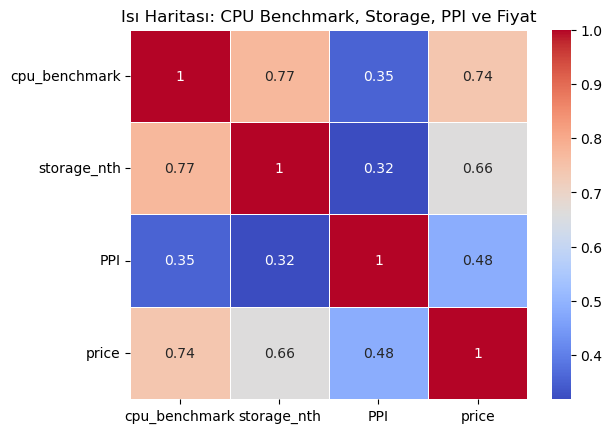

In [34]:
# CPU Benchmark, Storage Kapasitesi ve Fiyat arasındaki ısı haritası
correlation_matrix = df[['cpu_benchmark', 'storage_nth', 'PPI', 'price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Isı Haritası: CPU Benchmark, Storage, PPI ve Fiyat')
plt.show()

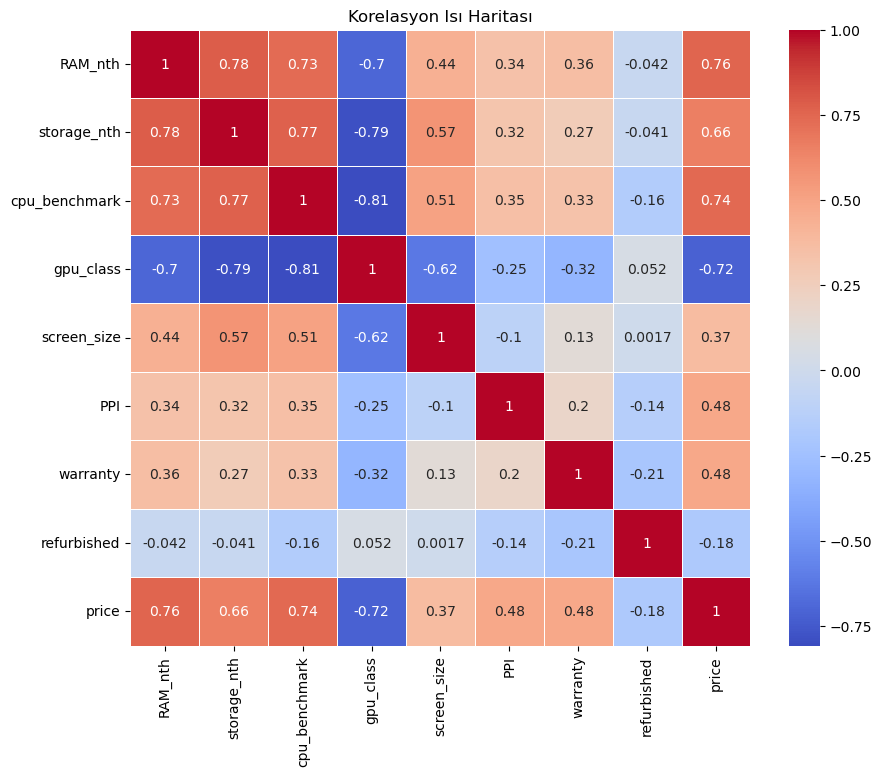

In [30]:
# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Korelasyon ısı haritasını oluştur
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasyon Isı Haritası')
plt.show()

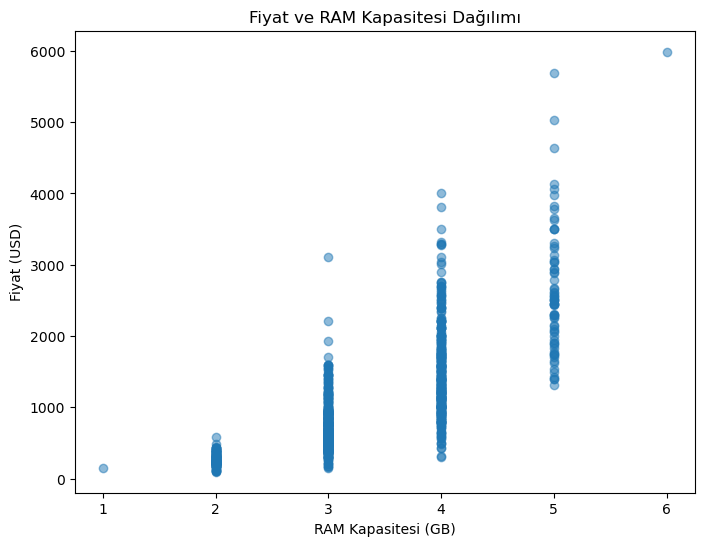

In [31]:
# Fiyat ile RAM Kapasitesi arasındaki dağılım grafiği
plt.figure(figsize=(8, 6))
plt.scatter(df['RAM_nth'], df['price'], alpha=0.5)
plt.title('Fiyat ve RAM Kapasitesi Dağılımı')
plt.xlabel('RAM Kapasitesi (GB)')
plt.ylabel('Fiyat (USD)')
plt.show()

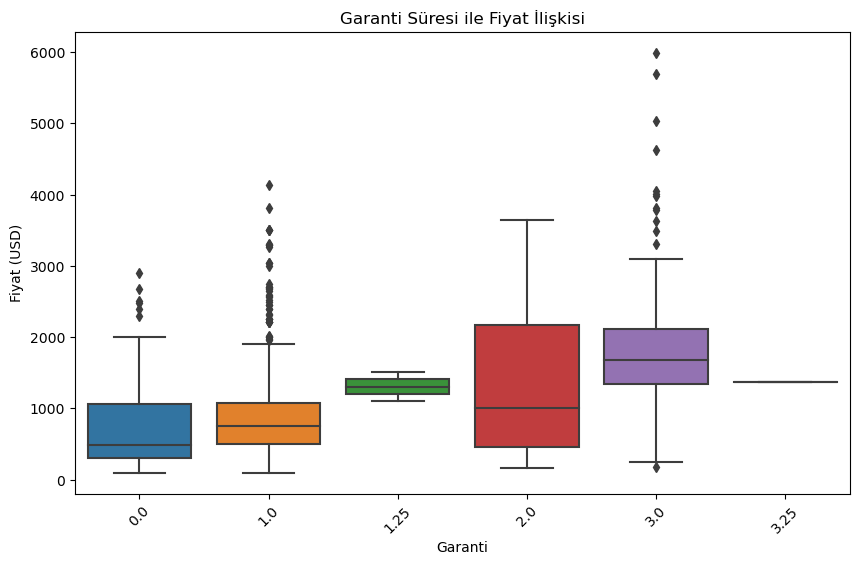

In [37]:
# CPU Benchmark kategorilerine göre fiyatın kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x='warranty', y='price', data=df)
plt.title('Garanti Süresi ile Fiyat İlişkisi')
plt.xlabel('Garanti')
plt.ylabel('Fiyat (USD)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# CPU Benchmark kategorileriyle ortalama fiyatların bar grafiği
avg_price_by_cpu = df.groupby('cpu_benchmark')['price'].mean()
avg_price_by_cpu.plot(kind='bar')
plt.title('CPU Benchmark ile Ortalama Fiyat İlişkisi')
plt.xlabel('CPU Benchmark')
plt.ylabel('Ortalama Fiyat (USD)')
plt.show()

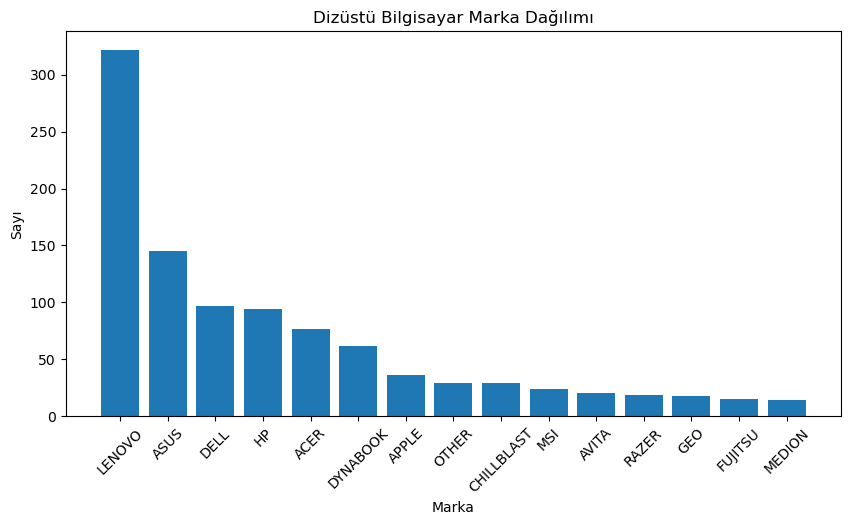

In [25]:
brand_counts = df['brand'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(brand_counts.index, brand_counts.values)
plt.title('Dizüstü Bilgisayar Marka Dağılımı')
plt.xlabel('Marka')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show()

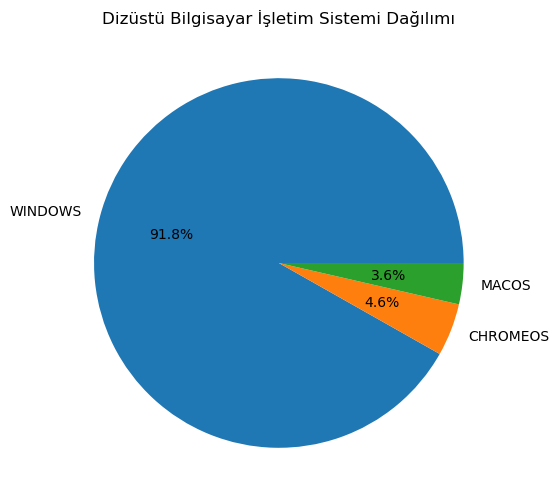

In [26]:
os_counts = df['operating_system'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%')
plt.title('Dizüstü Bilgisayar İşletim Sistemi Dağılımı')
plt.show()

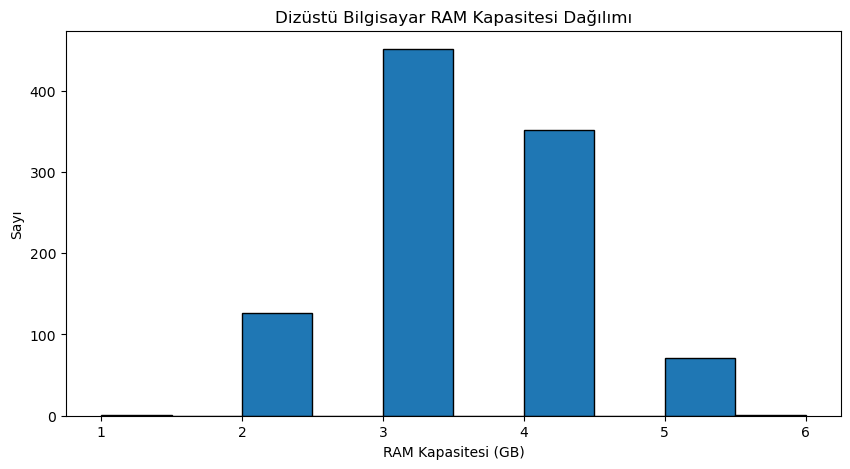

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(df['RAM_nth'], bins=10, edgecolor='k')
plt.title('Dizüstü Bilgisayar RAM Kapasitesi Dağılımı')
plt.xlabel('RAM Kapasitesi (GB)')
plt.ylabel('Sayı')
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaler nesnesini oluşturun
scaler = MinMaxScaler()

# Ölçeklendirilmesini istediğiniz sütunları belirtin
columns_to_scale = ['RAM_nth', 'storage_nth', 'cpu_benchmark', 'screen_size', 'PPI', 'warranty', 'price']

# Belirtilen sütunlara Min-Max ölçeklendirme uygulayın
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [40]:
# Onject sutunlar önemli olduğu için get_dummies uyguluyoruz:
df = pd.get_dummies(df, columns=['brand', 'operating_system', 'storage_type'])

# Sonuçları göster
print(df.head())

   RAM_nth  storage_nth  cpu_benchmark  gpu_class  screen_size       PPI  \
0      0.2     0.417310       0.048071          4     0.763889  0.192623   
1      0.2     0.430677       0.061535          3     0.763889  0.192623   
2      0.2     0.430677       0.077215          3     0.763889  0.000000   
3      0.2     0.430677       0.052699          4     0.763889  0.000000   
4      0.4     0.430677       0.066655          3     0.541667  0.258197   

   warranty  refurbished     price  brand_ACER  brand_APPLE  brand_ASUS  \
0  0.000000            1  0.023763           0            0           0   
1  0.307692            1  0.023933           0            0           1   
2  0.000000            1  0.027837           0            0           0   
3  0.000000            1  0.021641           0            0           0   
4  0.000000            1  0.047271           0            0           0   

   brand_AVITA  brand_CHILLBLAST  brand_DELL  brand_DYNABOOK  brand_FUJITSU  \
0            

## Modelleme:

In [41]:
x = df.drop(columns=['price'])
y = df['price']

In [42]:
def fnc_all_regression_models(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [43]:
fnc_all_regression_models(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.849478,0.055066,0.035016
KNeighborsRegressor,0.825260,0.059330,0.037263
ExtraTreeRegressor,0.804443,0.062765,0.036861
LinearRegression,0.762635,0.069149,0.045014
Ridge,0.759311,0.069632,0.045377
Lasso,-0.002391,0.142102,0.100037
ElasticNet,-0.002391,0.142102,0.100037


In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Gradient Boosting Regressor modelini oluşturun ve eğitin
model = GradientBoostingRegressor()
model.fit(x, y)  # X_train ve y_train, eğitim verilerinizi temsil etmelidir

# Test verileri üzerinde tahmin yapın
y_pred = model.predict(x)  # X_test, test verilerinizi temsil etmelidir

# Tahmin sonuçlarını "price_pred" sütununda saklayın
df['price_pred'] = y

In [47]:
df.head()

,RAM_nth,storage_nth,cpu_benchmark,gpu_class,screen_size,PPI,warranty,refurbished,price,brand_ACER,brand_APPLE,brand_ASUS,brand_AVITA,brand_CHILLBLAST,brand_DELL,brand_DYNABOOK,brand_FUJITSU,brand_GEO,brand_HP,brand_LENOVO,brand_MEDION,brand_MSI,brand_OTHER,brand_RAZER,operating_system_CHROMEOS,operating_system_MACOS,operating_system_WINDOWS,storage_type_EMMC,storage_type_SSD,price_pred
0,0.2,0.417310,0.048071,4,0.763889,0.192623,0.000000,1,0.023763,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.023763
1,0.2,0.430677,0.061535,3,0.763889,0.192623,0.307692,1,0.023933,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.023933
2,0.2,0.430677,0.077215,3,0.763889,0.000000,0.000000,1,0.027837,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.027837
3,0.2,0.430677,0.052699,4,0.763889,0.000000,0.000000,1,0.021641,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.021641
4,0.4,0.430677,0.066655,3,0.541667,0.258197,0.000000,1,0.047271,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.047271


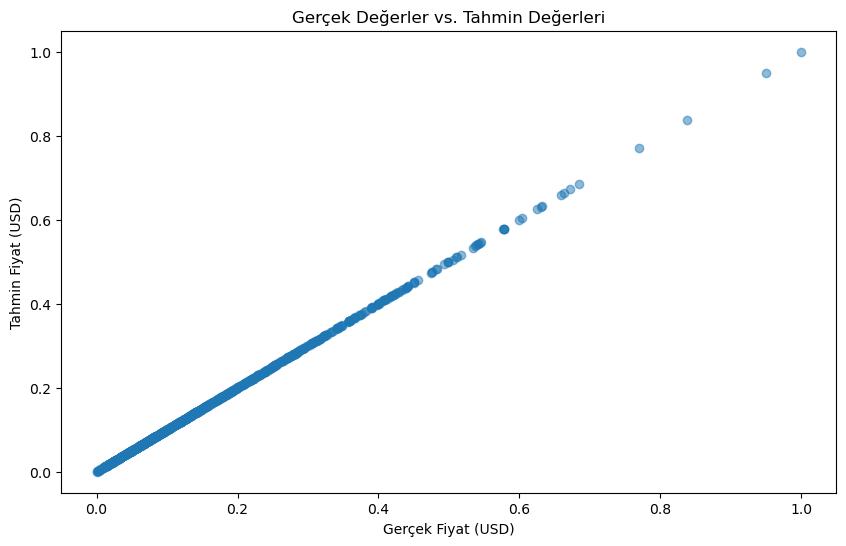

In [48]:
import matplotlib.pyplot as plt

# Tahmin değerleri
y_pred = df["price_pred"]

# Gerçek değerler
y_true = df['price']

# Gerçek değerler vs. Tahmin değerleri grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.title('Gerçek Değerler vs. Tahmin Değerleri')
plt.xlabel('Gerçek Fiyat (USD)')
plt.ylabel('Tahmin Fiyat (USD)')
plt.show()

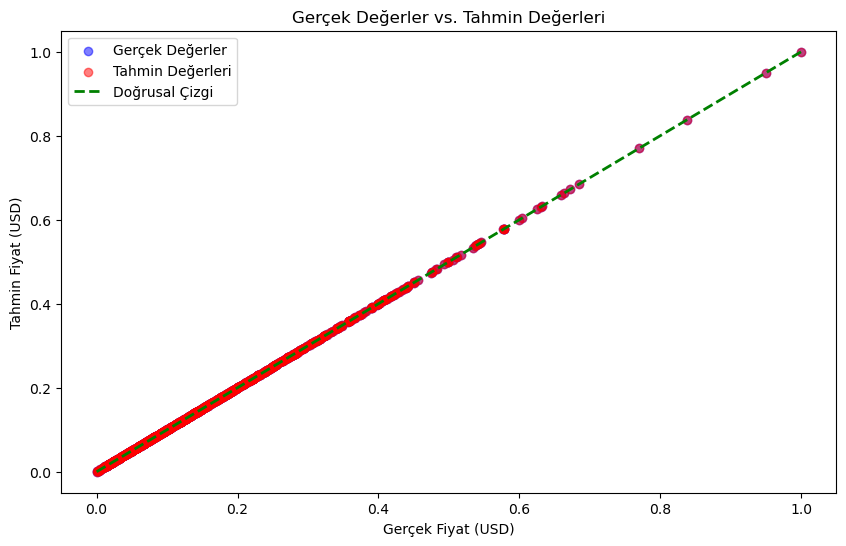

In [49]:
import matplotlib.pyplot as plt

# Gerçek değerler
y_true = df['price']

# Tahmin değerleri
y_pred = df['price_pred']

# Gerçek değerler vs. Tahmin değerleri grafiği
plt.figure(figsize=(10, 6))

# Gerçek değerler mavi renkte dağılım olarak gösterilir
plt.scatter(y_true, y_true, alpha=0.5, color='blue', label='Gerçek Değerler')

# Tahmin değerleri kırmızı renkte dağılım olarak gösterilir
plt.scatter(y_true, y_pred, alpha=0.5, color='red', label='Tahmin Değerleri')

# Doğrusal çizgi eklemek için
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='green', linestyle='--', linewidth=2, label='Doğrusal Çizgi')

plt.title('Gerçek Değerler vs. Tahmin Değerleri')
plt.xlabel('Gerçek Fiyat (USD)')
plt.ylabel('Tahmin Fiyat (USD)')
plt.legend()
plt.show()
